## Input Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('../Dataset//full_feature.csv')
df.head(3)

,originalRate,size,starRating,AIR_CONDITIONING,BALCONY_TERRACE,BATHROBES,BATHTUB,BLACKOUT_DRAPES_CURTAINS,COFFEE_TEA_MAKER,COMPLIMENTARY_BOTTLED_WATER,...,PARK,HOSPITAL,MUSEUM,GALLERY,PLACE_OF_WORSHIP,TRAIN_STATION,ZOO,ENTERTAINMENT,GARDEN.1,THEATER
0,1227273,46.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,596694,31.0,4.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1450413,52.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.shape

(5137, 294)

### Data Distribution

Original rate maximum value : 60000000
Original rate miimum value : 40313


<Figure size 2400x800 with 0 Axes>

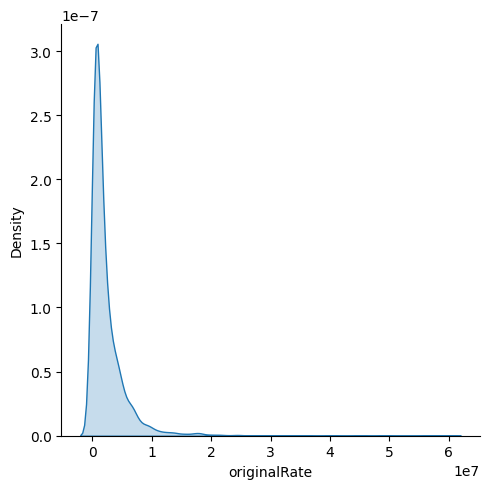

In [4]:
# MaxMin OriginalRate
print(f'Original rate maximum value : {df.originalRate.max()}')
print(f'Original rate miimum value : {df.originalRate.min()}')

# OriginalRate Distribution
plt.figure(figsize=(30, 10), dpi=80)
sns.displot(df,x="originalRate", kind="kde", fill=True)
plt.show()

In [5]:
# # outlier with z-score
# from scipy import stats

# def z_score_outlier(df, col):
#     z = np.abs(stats.zscore(df[col]))
#     return df[z < 3]
# df_len = len(df)
# df = z_score_outlier(df, 'originalRate')
# df_len = df_len - len(df)
# print(df.shape)
# print(f'Outlier count : {df_len}')

In [6]:
# remove outlier with standard deviation
def std_outlier(df, col):
    std = df[col].std()
    mean = df[col].mean()
    return df[(df[col] < mean + 3 * std) & (df[col] > mean - 3 * std)]


In [7]:
df_len = len(df)
df = std_outlier(df, 'originalRate')
df_len = df_len - len(df)
print(df.shape)

(5046, 294)


<Figure size 4800x1600 with 0 Axes>

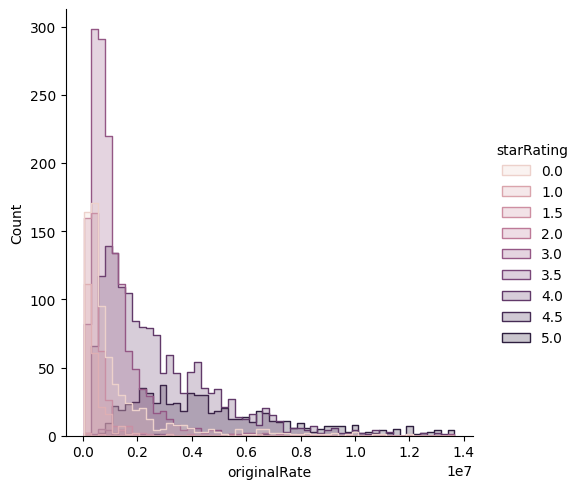

In [8]:
plt.figure(figsize=(30, 10), dpi=160)
sns.displot(df,x="originalRate", hue='starRating' , element="step", fill=True)
plt.show()

<Figure size 4800x1600 with 0 Axes>

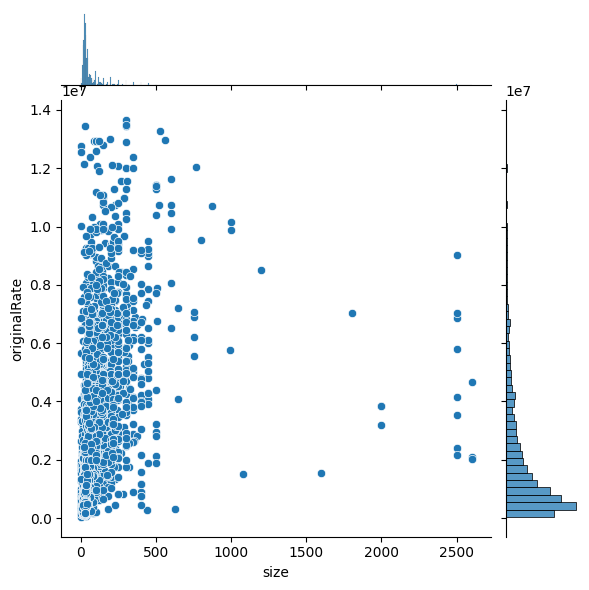

In [18]:
plt.figure(figsize=(30, 10), dpi=160)
sns.jointplot(data=df, x='size', y='originalRate')
plt.show()

In [11]:
df_len = len(df)
df = std_outlier(df, 'size')
df_len = df_len - len(df)
print(df.shape)

(5038, 294)


In [12]:
df.starRating.value_counts()

4.0    1577
3.0    1404
0.0     718
5.0     652
2.0     436
1.0     223
3.5      17
4.5       8
1.5       3
Name: starRating, dtype: int64

In [13]:
b0, b1, b15, b2, b3, b35, b4, b45, b5, b6 = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
for i in range (len(df)):
    # if df.originalRate[i] <= 1*10**7 and df.starRating[i] = 0.0:
    if df.starRating[i] == 0.0:
        b0 += 1
    elif df.starRating[i] == 1.0:
        b1 += 1
    elif df.starRating[i] == 1.5:
        b15 += 1
    elif df.starRating[i] == 2.0:
        b2 += 1
    elif df.starRating[i] == 3.0:
        b3 += 1
    elif df.starRating[i] == 3.5:
        b35 += 1
    elif df.starRating[i] == 4.0:
        b4 += 1
    elif df.starRating[i] == 4.5:
        b45 += 1
    elif df.starRating[i] == 5.0:
        b5 += 1
    else:
        print(df[i])
        b6 += 1

KeyError: 26

In [ ]:
print(f'0.0 : {b0}')
print(f'1.0 : {b1}')
print(f'1.5 : {b15}')
print(f'2.0 : {b2}')
print(f'3.0 : {b3}')
print(f'3.5 : {b35}')
print(f'4.0 : {b4}')
print(f'4.5 : {b45}')
print(f'5.0 : {b5}')
print(f'6.0 : {b6}')

0.0 : 0
1.0 : 0
1.5 : 0
2.0 : 0
3.0 : 0
3.5 : 0
4.0 : 0
4.5 : 0
5.0 : 0
6.0 : 0


In [ ]:
under1 = 0
under2 = 0
under3 = 0
under4 = 0
under5 = 0
under6 = 0
for i in range (len(df)):
    if df.originalRate[i] <= 1*10**7:
        under1 += 1
    elif df.originalRate[i] <= 2*10**7:
        under2 += 1
    elif df.originalRate[i] <= 3*10**7:
        under3 += 1
    elif df.originalRate[i] <= 4*10**7:
        under4 += 1
    elif df.originalRate[i] <= 5*10**7:
        under5 += 1
    elif df.originalRate[i] <= 6*10**7:
        under6 += 1
print(f'Original rate under 10Million : {under1}')
print(f'Original rate under 20Million : {under2}')
print(f'Original rate under 30Million : {under3}')
print(f'Original rate under 40Million : {under4}')
print(f'Original rate under 50Million : {under5}')
print(f'Original rate under 60Million : {under6}')

Original rate under 10Million : 0
Original rate under 20Million : 0
Original rate under 30Million : 0
Original rate under 40Million : 0
Original rate under 50Million : 0
Original rate under 60Million : 0


In [ ]:
under1 = 0
under2 = 0
under3 = 0
under4 = 0
under5 = 0
under6 = 0
under7 = 0
under8 = 0
under9 = 0
under10 = 0
for i in range (len(df)):
    if df.originalRate[i] <= 1*10**6:
        under1 += 1
    elif df.originalRate[i] < 2*10**6:
        under2 += 1
    elif df.originalRate[i] < 3*10**6:
        under3 += 1
    elif df.originalRate[i] < 4*10**6:
        under4 += 1
    elif df.originalRate[i] < 5*10**6:
        under5 += 1
    elif df.originalRate[i] < 6*10**6:
        under6 += 1
    elif df.originalRate[i] < 7*10**6:
        under7 += 1
    elif df.originalRate[i] < 8*10**6:
        under8 += 1
    elif df.originalRate[i] < 9*10**6:
        under9 += 1
    elif df.originalRate[i] <= 10*10**6:
        under10 += 1

print(f'Original rate under 1Million : {under1}')
print(f'Original rate under 2Million : {under2}')
print(f'Original rate under 3Million : {under3}')
print(f'Original rate under 4Million : {under4}')
print(f'Original rate under 5Million : {under5}')
print(f'Original rate under 6Million : {under6}')
print(f'Original rate under 7Million : {under7}')
print(f'Original rate under 8Million : {under8}')
print(f'Original rate under 9Million : {under9}')
print(f'Original rate under 10Million : {under10}')
print(under1+under2+under3+under4+under5+under6+under7+under8+under9+under10)

Original rate under 1Million : 0
Original rate under 2Million : 0
Original rate under 3Million : 0
Original rate under 4Million : 0
Original rate under 5Million : 0
Original rate under 6Million : 0
Original rate under 7Million : 0
Original rate under 8Million : 0
Original rate under 9Million : 0
Original rate under 10Million : 0
0
